## Digit Recognition using CNN

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # Output layer with 10 classes (0-9)
])

In [8]:
model.compile(optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.8660 - loss: 0.4281 - val_accuracy: 0.9831 - val_loss: 0.0486
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9826 - loss: 0.0542 - val_accuracy: 0.9877 - val_loss: 0.0358
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9883 - loss: 0.0385 - val_accuracy: 0.9886 - val_loss: 0.0344
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9901 - loss: 0.0300 - val_accuracy: 0.9888 - val_loss: 0.0315
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9929 - loss: 0.0225 - val_accuracy: 0.9916 - val_loss: 0.0270


In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9894 - loss: 0.0340
Test Accuracy: 99.16


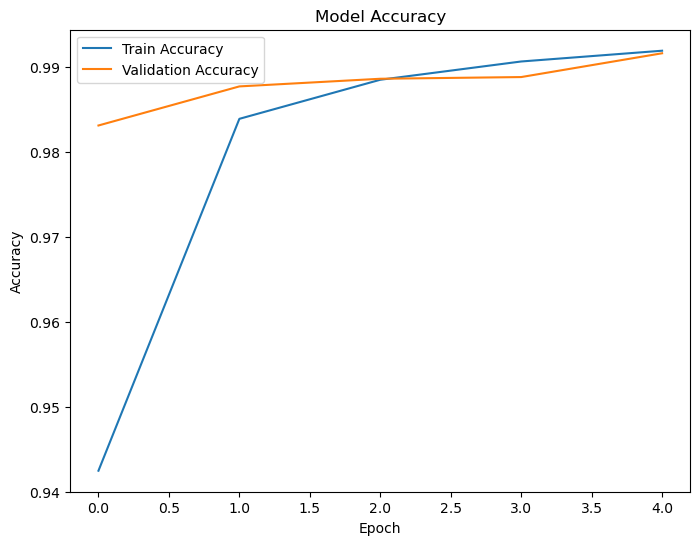

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()